In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
dataset = pd.read_csv(r'data\analytics vidhya\train_v9rqX0R.csv')

dataset.shape

(8523, 12)

In [4]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
dataset.describe(include=['object', 'bool'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [8]:
for feature in dataset.columns:
    print(feature, ':', len(dataset[feature].unique()), 'lables')

Item_Identifier : 1559 lables
Item_Weight : 416 lables
Item_Fat_Content : 5 lables
Item_Visibility : 7880 lables
Item_Type : 16 lables
Item_MRP : 5938 lables
Outlet_Identifier : 10 lables
Outlet_Establishment_Year : 9 lables
Outlet_Size : 4 lables
Outlet_Location_Type : 3 lables
Outlet_Type : 4 lables
Item_Outlet_Sales : 3493 lables


# Missing Values Analysis

In [9]:
features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean()*100,4), '%missing values')

Item_Weight 17.1653 %missing values
Outlet_Size 28.2764 %missing values


In [10]:
dataset['Item_Weight'].value_counts(sort=True)

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
6.775      2
9.420      1
6.520      1
5.400      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [11]:
dataset['Outlet_Size'].value_counts(sort=True)

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

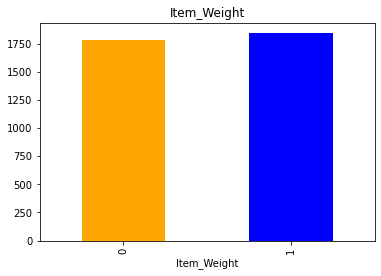

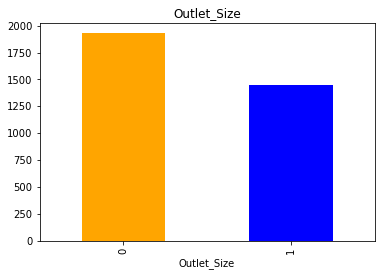

In [12]:
#Relation between missing values and dependent variable

for feature in features_with_na:
    data = dataset.copy()
    
    #1 indicates missing values, 0 indicates non zero values for a particular feature
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar( color = ['orange','blue'])
    plt.title(feature)
    plt.show()

In [13]:
len(dataset['Item_Identifier'].unique())

1559

In [14]:
len(dataset['Outlet_Identifier'].unique())

10

In [15]:
dataset.shape

(8523, 12)

In [16]:
#Numerical  Features

num_features = [feature for feature in dataset.columns if dataset[feature].dtypes !='O']

print('No.of numerical variables:', len(num_features))

dataset[num_features].head()

No.of numerical variables: 5


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [17]:
#Temporal Features

yr_features = [feature for feature in num_features if 'Yr' in feature or 'Year' in feature ]

yr_features

['Outlet_Establishment_Year']

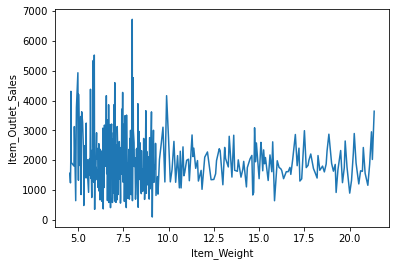

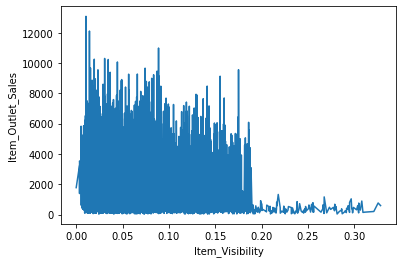

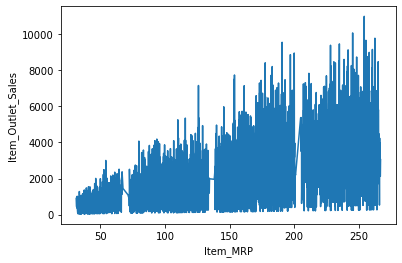

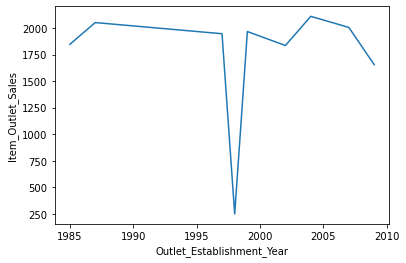

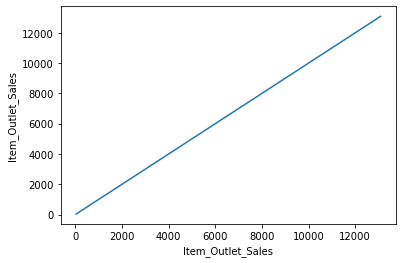

In [18]:
#Relation between each of numerical feature with dependent variable

for feature in num_features:
    data = dataset.copy()
    

    data.groupby(feature)['Item_Outlet_Sales'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

In [19]:
#Discrete Variables
discrete_features = [feature for feature in num_features if len(dataset[feature].unique())< 25  and feature not in yr_features]

print('No.of discrete features:',len(discrete_features))

discrete_features


No.of discrete features: 0


[]

In [20]:
#Continuous Variables

continuous_features = [feature for feature in num_features if feature not in discrete_features+yr_features]

print('continuous features:',len(continuous_features))

continuous_features

continuous features: 4


['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

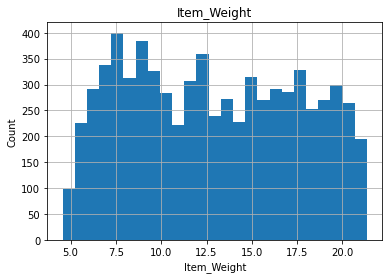

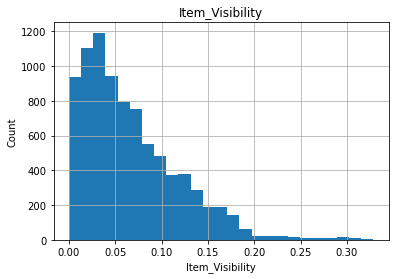

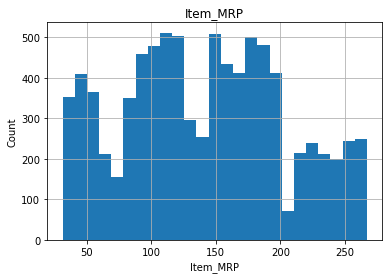

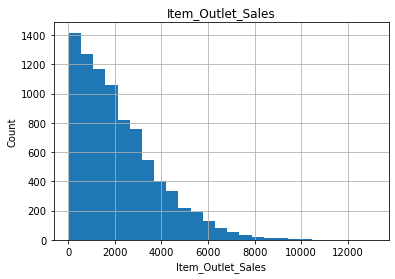

In [21]:
for feature in continuous_features:
    data = dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

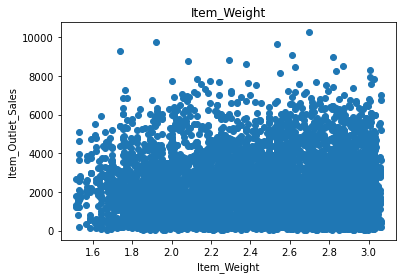

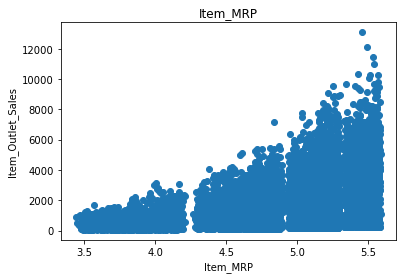

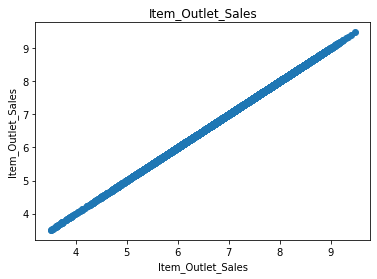

In [22]:
#Using Logarithmic transformation for normalising numerical features

for feature in continuous_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.scatter(data[feature],data['Item_Outlet_Sales'])
        plt.xlabel(feature)
        plt.ylabel('Item_Outlet_Sales')
        plt.title(feature)
        plt.show()

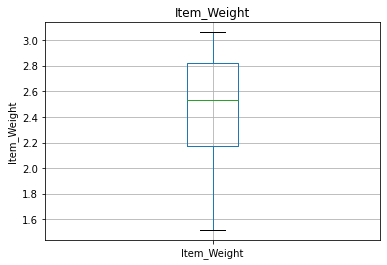

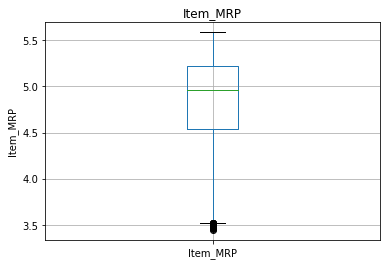

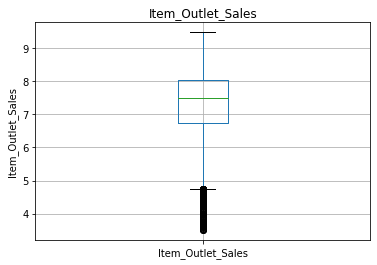

In [23]:
#Outliers

for feature in continuous_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [24]:
#Categorical Features

cat_features = [feature for feature in dataset.columns if dataset[feature].dtypes =='O']

print('No.of categorical variables:', len(cat_features))

dataset[cat_features].head()

No.of categorical variables: 7


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [25]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace('LF','Low Fat')
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace('low fat','Low Fat')

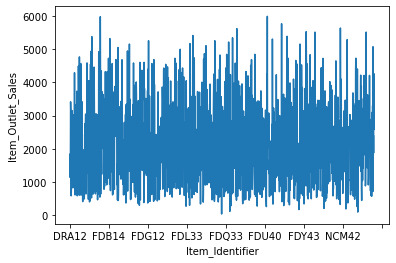

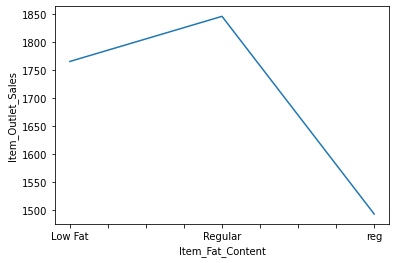

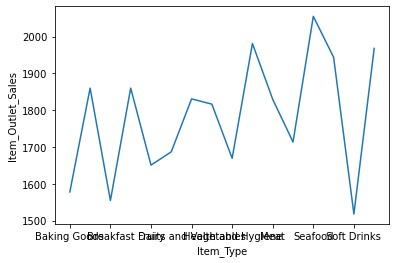

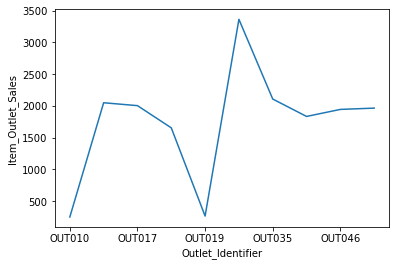

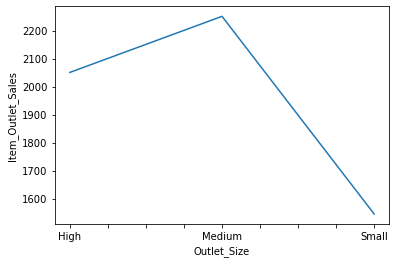

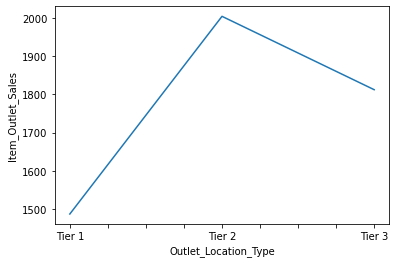

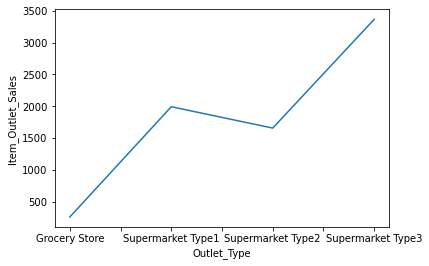

In [26]:
#Relation between each of categorical feature with dependent variable

for feature in cat_features:
    data = dataset.copy()
    

    data.groupby(feature)['Item_Outlet_Sales'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

In [27]:
corr = data.corr()
corr.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

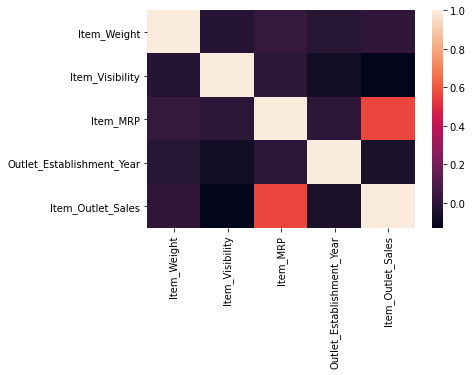

In [28]:
sns.heatmap(corr)